In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import coint

# Set random seed for reproducibility
np.random.seed(42)

In [4]:
# Define a function to fetch data for a pair of stocks
def fetch_pair_data(stock1, stock2, start='2010-01-01', end='2023-01-01'):
    data1 = yf.download(stock1, start=start, end=end)['Close']
    data2 = yf.download(stock2, start=start, end=end)['Close']
    return data1, data2

stock1 = 'SPY'
stock2 = 'GOLD'
data1, data2 = fetch_pair_data(stock1, stock2)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


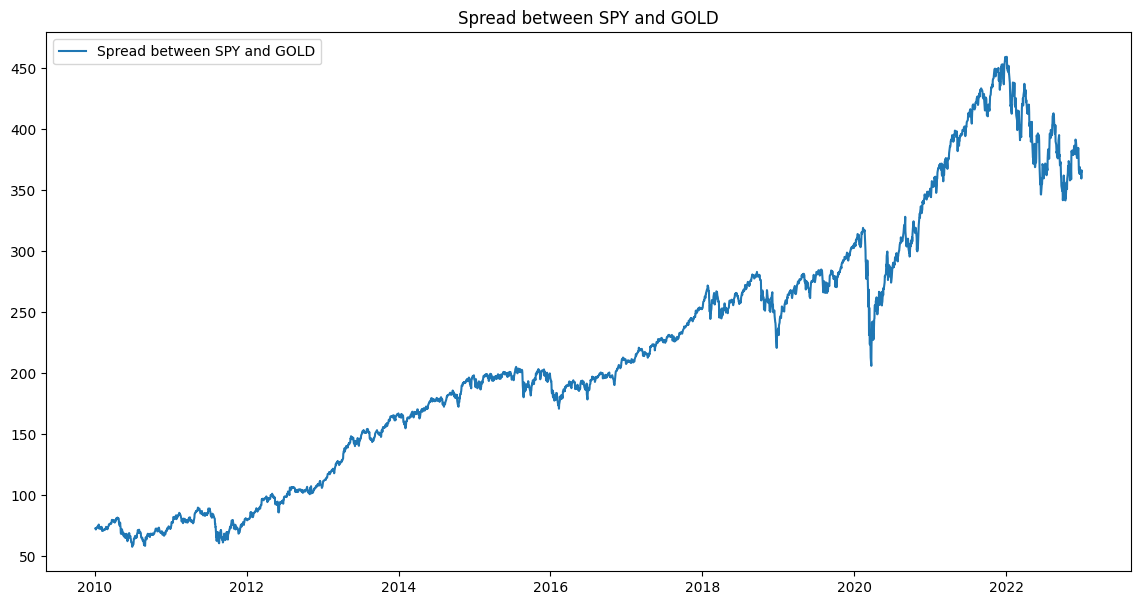

In [5]:
# Calculate the spread between the two stocks
spread = data1 - data2

# Plot the spread
plt.figure(figsize=(14, 7))
plt.plot(spread, label=f'Spread between {stock1} and {stock2}')
plt.legend()
plt.title(f'Spread between {stock1} and {stock2}')
plt.show()

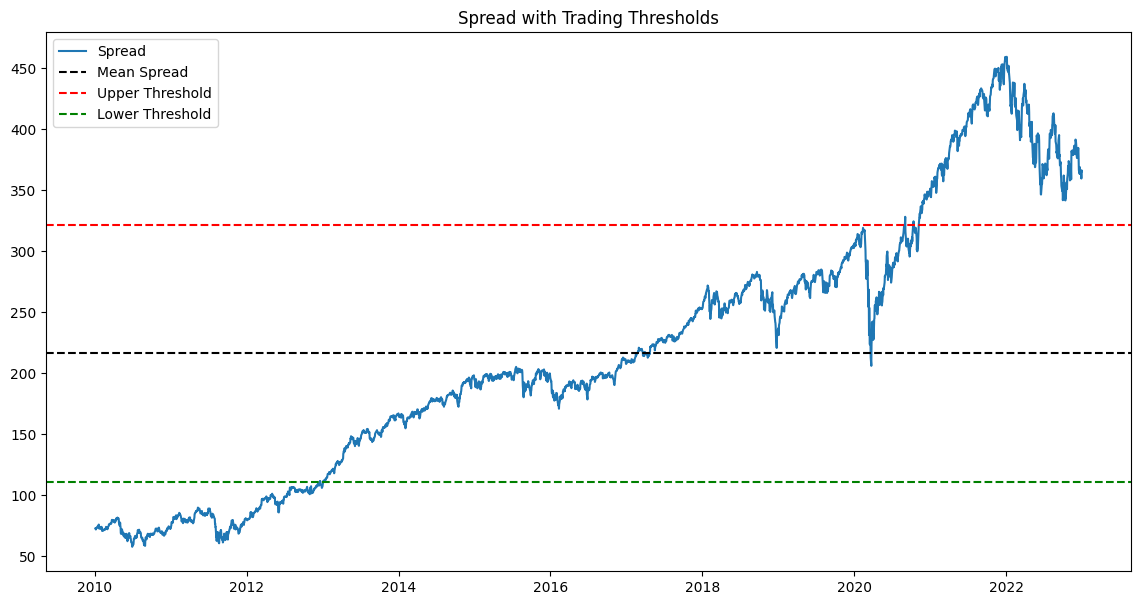

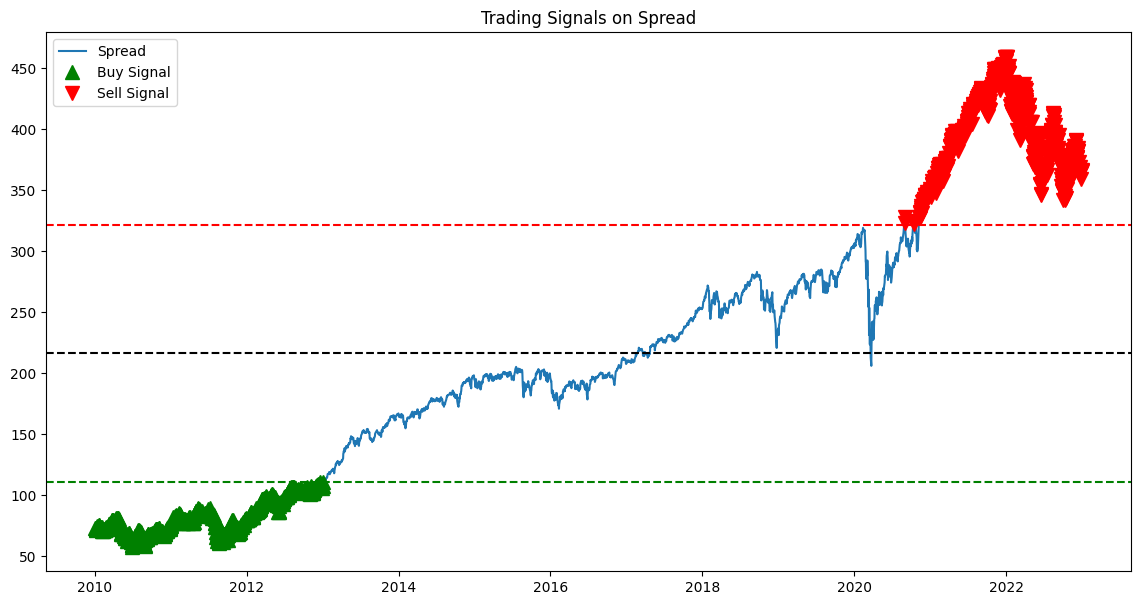

In [6]:
# Calculate the mean and standard deviation of the spread
mean_spread = spread.mean()
std_spread = spread.std()

# Define the upper and lower thresholds
upper_threshold = mean_spread + std_spread
lower_threshold = mean_spread - std_spread

# Plot the spread with thresholds
plt.figure(figsize=(14, 7))
plt.plot(spread, label='Spread')
plt.axhline(mean_spread, color='black', linestyle='--', label='Mean Spread')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower Threshold')
plt.legend()
plt.title('Spread with Trading Thresholds')
plt.show()

# Generate trading signals
signals = pd.DataFrame(index=spread.index)
signals['Spread'] = spread
signals['Signal'] = 0
signals.loc[spread > upper_threshold, 'Signal'] = -1  # Short the spread
signals.loc[spread < lower_threshold, 'Signal'] = 1   # Long the spread

# Plot the signals
plt.figure(figsize=(14, 7))
plt.plot(spread, label='Spread')
plt.plot(signals.loc[signals['Signal'] == 1].index, signals['Spread'][signals['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(signals.loc[signals['Signal'] == -1].index, signals['Spread'][signals['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.axhline(mean_spread, color='black', linestyle='--')
plt.axhline(upper_threshold, color='red', linestyle='--')
plt.axhline(lower_threshold, color='green', linestyle='--')
plt.legend()
plt.title('Trading Signals on Spread')
plt.show()

/var/folders/_n/qk6r78s130xcmlf3mhnhmyvm0000gn/T/ipykernel_95559/2020827540.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['Return'][signals['Signal'] == 1] = returns1[signals['Signal'] == 1] - returns2[signals['Signal'] == 1]
/var/folders/_n/qk6r78s130xcmlf3mhnhmyvm0000gn/T/ipykernel_95559/2020827540.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[            nan -9.73220575e-03 -2.05725144e-02  1.83496509e-02
 -2.98756739e-03 -3.67221049e-03  2.28543584e-02 -1.47936151e-03
  8.35566201e-03  7.80221870e-03  1.35031638e-02  3.49650672e-02
  1.64191289e-02 -2.17441770e-02  1.77304279e-02 -5.02294664e-03
  1.39059743e-02 -1.62288184e-02  1.94850994e-02 -3.26973632e-02
  2.00486573e-02  3.30223789e-03  2.23226453e-02

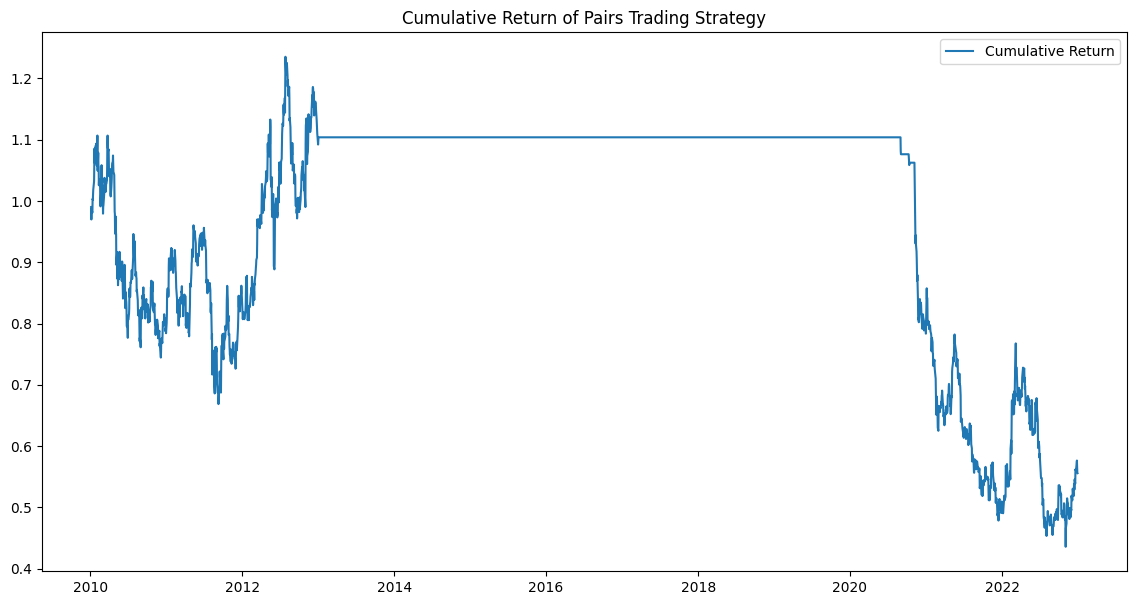

In [7]:
# Backtesting

# Calculate daily returns
returns1 = data1.pct_change()
returns2 = data2.pct_change()

# Calculate strategy returns
signals['Return'] = 0
signals['Return'][signals['Signal'] == 1] = returns1[signals['Signal'] == 1] - returns2[signals['Signal'] == 1]
signals['Return'][signals['Signal'] == -1] = returns2[signals['Signal'] == -1] - returns1[signals['Signal'] == -1]

# Calculate cumulative returns
signals['Cumulative Return'] = (1 + signals['Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(signals['Cumulative Return'], label='Cumulative Return')
plt.legend()
plt.title('Cumulative Return of Pairs Trading Strategy')
plt.show()

## Reflection and Lessons Learned

Implemented a sector-based pairs trading strategy using the following tech stack:

### Tech Stack
- **Python**: The programming language used for implementation.
- **NumPy**: For numerical operations.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: For data visualization.
- **yfinance**: To fetch historical stock data.

### Steps Taken
1. **Select Pairs of Stocks**: Identified pairs of stocks within the same sector.
2. **Fetch Historical Data**: Retrieved historical price data for the selected pairs using the yfinance API.
3. **Calculate Spread**: Computed the spread between the prices of the two stocks.
4. **Identify Trading Signals**: Determined buy and sell signals based on the spread and its statistical properties.
5. **Backtest the Strategy**: Evaluated the performance of the strategy using historical data.

### Key Learnings
- **Pairs Trading Basics**: Understanding the fundamentals of pairs trading, including the concept of spread and mean reversion.
- **Statistical Analysis**: Using statistical measures like mean and standard deviation to identify trading signals.
- **Backtesting**: Evaluating the effectiveness of the trading strategy using historical data.
